### ME5603 - Clase auxiliar de métodos numéricos
autor: @icalder-vsqz

fecha: 30 - 09 - 2022

Contenidos a revisar: 

* Integración numérica.
* Discretización de ecuaciones. 
* Problema de valor de frontera. 
* Método de las líneas (MOL) para resolución de EDP's.


In [1]:
# Importar librerías 
import numpy as np  # Para métodos numéricos
import CoolProp.CoolProp as cpp  # Propiedades termodinámicas
from scipy.integrate import solve_ivp, trapezoid, simpson  # Resolución de ecuaciones
import matplotlib.pyplot as plt  # visualizar resultados

#### Integración numérica

Sea una función $f(x)$ definida en el intervalo $[a, b]$ y se desea calcular la integral $\int\limits_{a}^{b} f(x) dx$. Mediante la integración numérica se aproxima ese valor mediante sumas de la forma: 

$I = \sum \limits_{i=0}^{n} A_i f(x_i)$,

donde $A_i$ son funciones de "peso" que dependerán del método de integración que estemos utilzando, $i$ es el índice de discretización de la coordenada $x$, y $f(x_i)$ es la función a integrar evaluada en el punto $x_i$. Dentro de estos, se encuentran las **fórmulas de Newton-Cotes** que aproximan la integral mediante polinomios de distinto orden. Cuando las integrales se aproximan mediante polinomios de mayor orden, esta se vuelve más precisa, pero requiere de más información de la función $f$ que se desea integrar. 

Consideremos una grilla de puntos equiespaciada, es decir, el intervalo $[a, b]$ lo dividimos en $n$ segmentos de tamaño $h = \frac{b-a}{n-1}$, se definen las siguientes fórmulas de Newton-Cotes: 

* Regla del trapezoide

Como indica su nombre, la integral se va aproximando mediante la suma de segmentos del área bajo la curva como si se tratase de pequeños trapezoides. Así, la suma definida más arriba queda como: 

$I = \sum \limits_{i=0}^{n} I_i$, con $I_i = \frac{h}{2} ( f(x_i) + f(x_{i+1}) ) $

Con un poco de matemática se puede llegar a la siguiente fórmula:

$ I = \frac{h}{2} \left( f(x_0) + \sum \limits_{i=1}^{n-1} 2 f(x_i) + f(x_n) \right) $

* Regla de Simpson

Es una fórmula que se deduce de interpoladores de segundo orden. Para este caso, el área aproximada pasa a ser una parábola en cada intervalo definido.  La fórmula general es:

$ I = \frac{h}{3} \left( f(x_0) + 4 f(x_1) + 2 f(x_2) + 4 f(x_3) + ... + 2 f(x_{n-2}) + 4 f(x_{n-1}) + f(x_n) \right) = \frac{h}{3} \left( f(x_0) + 4 \sum \limits_{i=1}^{n/2} f(x_{2i-1}) + 2 \sum \limits_{i=1}^{n/2 - 1} f(x_{2i}) + f(x_n) \right) $

Este método destaca por su precisión pues cuenta con un error de truncado de cuarto orden. 


#### Ejemplo 1: Integral de la función $sin(x)$

In [3]:
# Definición del intervalo [a, b] 
a = 0
b = np.pi

# Paso 0: Grilla x en el intervalo
n = 10  # número de segmentos - entregado por el usuario
h = (b-a) / (n-1)  # espaciado entre elementos
x_v1 = np.arange(a, b + 0.5*h, h)  # creamos un vector equiespaciado entre a y b
x_v2 = np.linspace(a, b, n)  # vector equiespaciado pero de otra forma

# Integraremos la función sin(x) 
# el resultado analítico de esta integral es -cos(x)
# Integral de sin(x) entre a y b = -cos(b) + cos(a)
# Comparemos el valor de esa función en el intervalo a, b

# Definición de funciones para trabajar

def integrate_sin_analytic(x):
    x_f = x[-1]
    x_0 = x[0]
    return -(np.cos(x_f) - np.cos(x_0))

def integrate_sin_trapezoid(x, h):
    f_eval = np.sin(x)
    return trapezoid(f_eval, x=x) 

def integrate_sin_simpson(x, h): 
    f_eval = np.sin(x)
    return simpson(f_eval, x=x)

def compare_integrals(x, h, n, show=True):
    
    I_1 = integrate_sin_analytic(x)
    I_2 = integrate_sin_trapezoid(x, h)
    I_3 = integrate_sin_simpson(x, h)
    
    if show:
        print(f'--- Resultados para n = {n} ---')
        print(f'Valor de la integral analítica: {I_1:.2f}')
        print(f'Valor de la integral por método de trapezoide: {I_2:.2f}')
        print(f'Valor de la integral por método de simpson: {I_3:.2f}')
    
    return I_1, I_2, I_3

I_1, I_2, I_3 = compare_integrals(x_v2, h, n)

--- Resultados para n = 10 ---
Valor de la integral analítica: 2.00
Valor de la integral por método de trapezoide: 1.98
Valor de la integral por método de simpson: 2.00


#### Ejemplo 2: Análisis de grilla

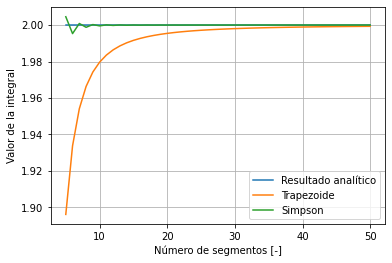

In [4]:
# Definiremos valores de n y h dedistinto tamaño para analizar la convergencia de los métodos de integración numérica
# con respecto al valor analítico 

n_candidates = np.linspace(5, 50, 46, dtype=int)  # vector de segmentos 
I_2_v = np.zeros(len(n_candidates))  # colección de resultados de la integral mediante método de trapezoide
I_3_v = np.zeros(len(n_candidates))  # colección de resultados de la integral mediante método de simpson

# Para cada n y h se calcula la integral
for i, nc in enumerate(n_candidates):
    hc = (b-a) / (nc-1)  # defino espaciados
    xc = np.linspace(a, b, nc)  # defino la grilla de puntos
    I1, I2, I3 = compare_integrals(xc, hc, nc, show=False)  # resultados de integración
    I_2_v[i] = I2
    I_3_v[i] = I3
    
# gráfico de resultados para analizar
plt.figure()
plt.plot(n_candidates, I1*np.ones(len(n_candidates)), label='Resultado analítico')
plt.plot(n_candidates, I_2_v, label='Trapezoide')
plt.plot(n_candidates, I_3_v, label='Simpson')
plt.xlabel('Número de segmentos [-]')
plt.ylabel('Valor de la integral')
plt.legend()
plt.grid(True)

---
#### Resolución de ecuaciones en derivadas parciales y discretización 

Consideremos el siguiente problema de transferencia de calor:

Sea una barra cilíndrica de largo $L = 0.5 [m] $ que se encuentra entre dos paredes: una a temperatura $T_1 = 50 °C$ y la otra opuesta aislada. La barra  tiene una difusividad de 1e-5 $m^2 / s$. Resuelva el campo de temperaturas del sistema mediante resolución numérica. 

Consideremos los siguientes supuestos para la resolución:

* La barra es homogénea e isotrópica (conducción no cambia con la posición axial).
* El diámetro de la barra es más pequeño que el largo, lo que reduce este problema a unidimensional y relevante en la corrdenada $z$ (axial).
* No se consideran pérdidas térmicas al ambiente.

#### Ecuación de energía:

$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial z^2} $

#### Condiciones de borde: 

Debido a la derivada de segundo orden, se necesitan dos condiciones de borde para resolver el problema.

* $T(z = 0, t) = 50$ °C, $ \forall t $
* $\frac{\partial T}{\partial z} = 0 $ en $z = L$, $\forall t$

#### Condiciones iniciales:

$T(x, t=0) = 25$ °C para $t = 0$

#### Aplicación del método de las líneas para resolver el problema numérico:

El método de las líneas para resolver ecuaciones en derivadas parciales, consiste en reducir las derivadas parciales a ecuaciones diferenciales ordinarias. Para ello se utilizan diferencias finitas o "líneas" para aproximar las derivadas en una dimensión, y dejar las derivadas de la otra dimensión intactas. De esa manera, se tendrá un sistema de ecuaciones diferenciales ordinarias a resolver, donde el resultado es el valor de la función en cada "intervalo" de discretización empleado. 

En este método, la forma de las ecuaciones dependerá de la posición en la grilla de la variable discretizada, por lo que se pueden dar diferentes expresiones si se tienen condiciones de borde o ecuaciones generales. 

* Paso 1: Definir la grilla de discretización. 

La coordenada a discretizar para este caso es $z$, pues la temperatura en esa coordenada cambiará con el tiempo dependiendo del instante especificado. Esto hará que nuestro problema se reduza a un problema de valor inicial y que puede ser resuelto directamente con métodos de Euler o Runge-Kutta vistos en clases. Dividiremos el intervalo $[0, L]$ en $n$ segmentos equiespaciados de tamaño $h$, es decir:

$z_0 = 0$, $z_n = L$ y $h = \frac{L}{n - 1}$. Es decir, $z = z_0, ..., z_{i-1}, z_{i}, ..., z_n$

* Paso 2: Discretizar la ecuación general.

Consideremos $0 < i < n$. La ecuación de energía para este caso quedará como:

$\frac{d T_i}{d t} = \beta \left(T_{i+1} - 2 T_{i} + T_{i-1}\right)$, con $\beta = \alpha / h^2$

Para este paso, hemos discretizado la derivada de segundo orden con el esquema de diferencias finitas visto en clases, y así tendremos una **derivada total** en el tiempo de la temperatura $T_i$ que podemos resolver sabiendo las temperaturas $T_{i+1}$ y $T_{i-1}$. Por esa razón, nos queda de momento un sistema de ecuaciones de tamaño $n - 2$.

* Paso 3: Discretizar las condiciones de borde.

Para resolver el sistema de ecuaciones es necesario incluir las condiciones de borde del problema. Esto quiere decir que tendremos que discretizar también las derivadas de las condiciones de aislación. 

Para $i = 0$ tendremos: 

$T_{0} = 50$ °C (Su valor no cambia en el tiempo), y para el método de las líneas es necesario dejarlo en función de una derivada temporal, por lo que derivando esa expresión se tiene:

$\frac{d T_{0}}{d t} = 0$

Para $i = n$ es la parte de la barra que se encuentra aislada, luego: 

$\frac{\partial T}{\partial z} \approx \frac{3 T_{n} - 4 T_{n-1} + T_{n-2}}{2 h}  = 0 $ (aproximación de diferencias finitas de primera derivada usando "backwards finite difference"), luego:

$ T_n = \frac{4}{3} T_{n-1} - \frac{1}{3}T_{n-2}$

Derivando en el tiempo la última expresión tenemos:

$\frac{d T_n}{d t} = \frac{4}{3} \frac{d T_{n-1}}{d t} - \frac{1}{3} \frac{d T_{n-2}}{d t}$

Y con esto, se pueden agregar estas ecuaciones a las anteriores, cerrando el sistema con n ecuaciones y n incógnitas. 

* Paso 4: Resolver el problema de valor inicial.

Considerando las condiciones iniciales del problema, se define $T_i = 25$ para $t = 0$ y se resuelve el sistema mediante integración directa.

Veamos cómo esto resulta en código.

In [5]:
def solve_heat_eq_cyl_rod(time, n):

    # Datos del problema
    largo_placa = 0.5  # m
    alpha = 1e-5  # m2 / s 

    # Definición de la grilla del problema
    n_z = n  # número de segmentos en z
    z = np.linspace(0, largo_placa, n_z)
    
    # Condiciones iniciales
    temp_init = 25 + 273.15  # temperatura en K
    temp_at_z_0 = 50 + 273.15  # temperatura al extremo z=0 de la barra
    T_0 = temp_init * np.ones(n)  # Condiciones iniciales 
    T_0[0] = temp_at_z_0  # se eleva la temperatura del extremo
    
    # resolución mediante RK45
    t0 = time[0]
    tf = time[-1]
    sol = solve_ivp(heat_eq, t_span=(t0, tf), y0=T_0, method='RK45', t_eval=time, args=(largo_placa, n_z, alpha))
    
    return sol.t, z, sol.y
    
def heat_eq(t, y, largo_placa, n_z, alpha):  # solve_ivp pide que la función a integrar sea dydt = f(t, y, arg_1, arg_2, arg_3, ...)
    # cuando se aplica el solver los argumentos se entregan a solve_ivp como arg=(arg_1, arg_2, arg_3, ...)
    
    T = y  # redefino la variable y por comodidad 
    dTdt = np.zeros(len(T))  # vector vacío de derivadas que debo definir. Estas contendrán las ecuaciones
    
    h_z = largo_placa / n_z  # resolución espacial en z
    beta = alpha / h_z**2 
    
    # ecs del paso 2: 0 < i < n
    dTdt[1:-1] = beta * (T[:-2] - 2*T[1:-1] + T[2:])  # T_{i-1} - 2*T_{i} + T_{i+1}
    
    # Condiciones de borde: 
    # i = 0
    dTdt[0] = 0
    # i = n
    dTdt[-1] = (4/3) * dTdt[-2] - (1/3) * dTdt[-3]  # dTdt_{n} = 4/3 * dTdt_{n-1} - 1/3 * dTdt_{n-2}
    
    return dTdt
    

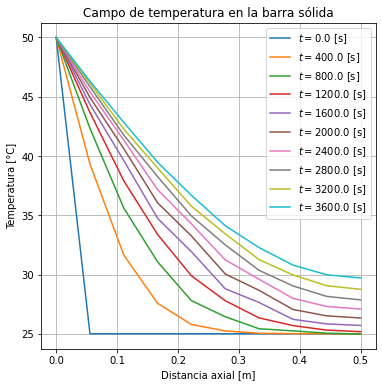

In [6]:
time = np.linspace(0, 3600, 10)  # segundos
n = 10  # número de segmentos
t, z, T = solve_heat_eq_cyl_rod(time, n)  # solución del sistema de ecuaciones

plt.figure(figsize=(6, 6))
for i, t in enumerate(time):
    plt.plot(z, T[:, i] - 273.15, label=rf'$t = {t}$ [s]')  # gráfico de temperaturas en celsius
plt.xlabel('Distancia axial [m]')
plt.ylabel('Temperatura [°C]')
plt.title('Campo de temperatura en la barra sólida')
plt.legend()
plt.grid(True)

#### Referencias

- Documentación de scipy: 
  * [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html)
  * [simpson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html)
  * [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
  
- Fórmulas de diferencias finitas
  * [Material complementario de diferencias finitas](https://drive.google.com/file/d/1yV6QNe7PmfbH64sEGkxvYp3qX0rM2lNn/view?usp=sharing)

- Documentación de CoolProp: 
  * [Instalación en MatLab](http://www.coolprop.org/coolprop/wrappers/MATLAB/index.html)
  * [Instalación en python](http://www.coolprop.org/coolprop/wrappers/Python/index.html)
  * [Instalación en Excel](http://www.coolprop.org/coolprop/wrappers/Excel/index.html)
  * [Uso](http://www.coolprop.org/coolprop/HighLevelAPI.html)
  

